## <font color='darkblue'> ASTR 21000

## <font color='darkblue'> Homework Assignment 2

### Undegraduate students (45 points + 20 extra-credit points)
### Graduate students (55 points + 10 extra-credit points)

### Distributed: Friday, April 9

### Due: Friday, April 16  

### <font color='darkblue'> A general note:
    
You can use any code from the notebooks I distributed in this course in implementation of your codes in this and future assignments. 
    
**Undergraduate students:** default required exercises are 1, 3, 4. You can choose exercise 2 *instead* of 1 for 10 extra-credit points.  
    
**Graduate students:** default required exercises are 2, 3, 4. 
    
Exercise 5 is optional and can be done for extra-credit by anyone. 
    
**Suggestions:** If you are not sure how to implement MCMC sampler in exercise 1 or 2, or 3 or it's taking significant time, we recommend that you carry out exercise 4 using <tt>mcmc_simple</tt> (for full credit; see example of its use for a similar problem in <a href="04_mcmc_linear_fit_class"><tt>04_mcmc_linear_fit_class</tt> notebook</a>) or <tt>emcee</tt> package (example at the bottom of the notebook). 
    
**If some phrasing is unclear, or you are not sure what you are asked to do, pleas ask us** during Friday lab, in #hw02
or via direct messaging one of the instructors on slack, after classes, or during office hours next Thursday.

**Preferred channel of general communication during lab and at other times outside class:** slack workspace for this course: <tt><a href="https://a211s21.slack.com/">a211s21.slack.com</a></tt> - we will answer questions on slack as soon as we can. 

In [1]:
import numpy as np 

# use jupyter "magic" command to tell it to embed plot into the notebook 
import matplotlib.pyplot as plt
%matplotlib inline

# the following commands make plots look better
dpi = 200
plt.rcParams['figure.dpi']= dpi
plt.rc("savefig", dpi=dpi)
plt.rc('font', size=10)
plt.rc('xtick', direction='in') 
plt.rc('ytick', direction='in')
plt.rc('xtick.major', pad=5) 
plt.rc('xtick.minor', pad=5)
plt.rc('ytick.major', pad=5) 
plt.rc('ytick.minor', pad=5)
plt.rc('lines', dotted_pattern = [2., 2.])
# if you don't have LaTeX installed on your laptop and this statement 
# generates error, comment it out
#plt.rc('text', usetex=True)

### <font color='darkblue'> Exercise 1. Writing, testing, and applying your own simple Metropolis MCMC ensemble sampler (20 points)    

#### This exercise is default option for undergraduate students
        
#### <font color='darkblue'> What are you learning in this exercise: 

* How to code an ensemble MCMC sampler function

* How to code and use Gelman-Rubin indicator to check chain convergence
    
* How to test your MCMC sampler function
    
In addition, you will be practicing using NumPy operations with multi-dimensional NumPy arrays or polishing your skills in this area. 
    
#### <font color='darkblue'> Task 1a. (17 points)
In the <a href="https://drive.google.com/file/d/1admxUF7VxXOUjlBAnqNIEvjPL6pOO57G/view?usp=sharing">03_multid_sampling_mcmc</a> notebook, standard Metropolis MCMC algorithm was implemented in the function <tt>mcmc_simple</tt>. Write a function <tt>mcmc_vectorized</tt> with the input and output format specified in the function header below that implements this algorithm in the ensemble sampling mode with multiple *independent* chains ("walkers") run in parallel.  

*Implementation should use numpy operations to handle step proposals and acceptance/rejection for all walkers
and should only use a single outer loop within the function of the form*
    
    while not converged or nsteps < nminsteps:
                            
where <tt>nsteps</tt> is step counter and <tt>converged</tt> is a boolean variable set to True when convergence criterion is satisfied. 
    
  The convergence criterion should be implemented in a function that is passed via <tt>conv_args</tt> parameter to <tt>mcmc_vectorized</tt>. This function should accept chains as input and return False if chains have not converged and True if chains converged. This function should be called once every <tt>nconv</tt> MCMC iterations setting variable <tt>converged</tt> to its output.
    
 When you develop your MCMC function in this exercise, you can simply set up this function to always return True regardless of input, so that the chains will simply be run for <tt>nminsteps</tt> iterations. After your MCMC function is tested, you can then implement convergence criterion and test it in exercise 3 below. 
    
#### <font color='darkblue'> Task 1b. (3 points) Test your MCMC function by sampling 2d Gaussian pdf using function <tt>lngauss_nd</tt> below, similarly to how this was done in the notebook <a href="https://drive.google.com/file/d/1yNJQ_tdpg8-zJ2RvsoAA_B06Nv8sLphl/view?usp=sharing"><tt>04_mcmc_linear_fit_class</tt></a> and present plots showing results. Estimate and examine correlation time for each of the 2 parameters of the 2d Gaussian. 

 If you install <tt>emcee</tt> package (using <tt>pip install emcee</tt>), you can also compare to the results of this package for the same Gaussian, as shown at the bottom of this notebook. 


In [2]:
def mcmc_vectorized(x, nminsteps=1, step=1., logpdf=None, args=None, 
                    nconv=1000, convergence_func=None, conv_args=None):
    """
    Standard Metropolis MCMC algorithm in the ensemble sampling regime
    using a number of chains ("walkers") in parallel to sample distributions 
    of arbitrary number of dimensions ndim
    
    Parameters:
    ------------
    x0 - numpy array of floats of shape (nwalkers,ndim)
        containing initial x values of the chains
    minsteps - integer
        minimum number of MCMC steps (iterations) to make regardless of convergence criterion
    step - float
        step size controlling step proposal distribution
    rgr - float, Gelman-Rubin convergence indicator
    logpdf - python function object
        ln(pdf) where pdf is the target pdf to sample
    args - list, list of arguments to pass logpdf functions (as logpdf(x, *args))
    nconv - integer, check convergence of the chains every nconv number of steps 
    convergence_func - Python function object,
        function implementing a convergence criterion returning False if chains have not 
        converged and True if they converged
    Returns:
    ---------
    chain - numpy array of shape (nsteps*nwalkers, ndim)
        x values of samples in the MCMC chains given that chain length is nsteps
        (note that nsteps may be determined either by nminsteps or by the convergence criterion if
        chains have not converged in nminsteps)
    """


In [3]:
def lngauss_nd(x, means, icov):
    """
    ln of N-dimensional unnormalized Gaussian pdf (neglecting the constant in front of exp)
    
    Parameters:
    -----------
    x - real 1d numpy vector of size ndim
        position of a sample in ndim-dimensional space
    means - real 1d numpy vector of size ndim
        mean values of the Gaussian in each coordinate
    icov - numpy array of floats of shape (ndim, ndim)
        inverse covariance matrix of the Gaussian
        
    Returns:
    --------
    
    a real number 
        ln(Gaussian)
    """
    diff = x - means
    
    return -0.5 * np.dot(diff.T, np.dot(icov, diff)) 

In [4]:
def gauss_nd(x, means, icov):
    """
    N-dimensional unnormalized Gaussian pdf
    
    Parameters:
    -----------
    x - real 1d numpy vector of size ndim
        position of a sample in ndim-dimensional space
    means - real 1d numpy vector of size ndim
        mean values of the Gaussian in each coordinate
    icov - real numpy array of size [ndim x ndim]
        inverse covariance matrix of the Gaussian
        
    Returns:
    --------
    
    a real number 
        ln(Gaussian)
    """
    diff = x - means
    
    return np.exp(-0.5 * np.dot(diff , np.dot( icov , diff ))) 

In [5]:
# you don't need to review or understand this code
# this is a function for plotting 2d distribution of points as a histogram that will be used for plots below

import scipy.optimize as opt
from matplotlib.colors import LogNorm

def conf_interval(x, pdf, conf_level):
    return np.sum(pdf[pdf > x])-conf_level

def plot_2d_dist(x,y, xlim, ylim, nxbins, nybins, figsize=(5,5), 
                cmin=1.e-4, cmax=1.0, smooth=None, xpmax=None, ypmax=None, 
                log=False, weights=None, xlabel='x', ylabel='y', 
                clevs=None, fig_setup=None, savefig=None):
    """
    construct and plot a binned, 2d distribution in the x-y plane 
    using nxbins and nybins in x- and y- direction, respectively
    
    log = specifies whether logged quantities are passed to be plotted on log-scale outside this routine
    """
    if fig_setup is None:
        fig, ax = plt.subplots(figsize=figsize)
        plt.ylabel(ylabel)
        plt.xlabel(xlabel)
        plt.xlim(xlim[0], xlim[1])
        plt.ylim(ylim[0], ylim[1])
    else:
        ax = fig_setup
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_xlim(xlim); ax.set_ylim(ylim)

    if xlim[1] < 0.: ax.invert_xaxis()

    if weights is None: weights = np.ones_like(x)
    H, xbins, ybins = np.histogram2d(x, y, weights=weights, bins=(np.linspace(xlim[0], xlim[1], nxbins),np.linspace(ylim[0], ylim[1], nybins)))
    
    H = np.rot90(H); H = np.flipud(H); 
             
    X,Y = np.meshgrid(xbins[:-1],ybins[:-1]) 

    if smooth != None:
        from scipy.signal import wiener
        H = wiener(H, mysize=smooth)
        
    H = H/np.sum(H)        
    Hmask = np.ma.masked_where(H==0,H)
    
    if log:
        X = np.power(10.,X); Y = np.power(10.,Y)

    pcol = ax.pcolormesh(X, Y,(Hmask), vmin=cmin*np.max(Hmask), vmax=cmax*np.max(Hmask), cmap=plt.cm.BuPu, norm = LogNorm(), linewidth=0., rasterized=True)
    pcol.set_edgecolor('face')
    
    # plot contours if contour levels are specified in clevs 
    if clevs is not None:
        lvls = []
        for cld in clevs:  
            sig = opt.brentq( conf_interval, 0., 1., args=(H,cld) )   
            lvls.append(sig)
        
        ax.contour(X, Y, H, linewidths=(1.0,0.75, 0.5, 0.25), colors='black', levels = sorted(lvls), 
                norm = LogNorm(), extent = [xbins[0], xbins[-1], ybins[0], ybins[-1]])
    if xpmax is not None:
        ax.scatter(xpmax, ypmax, marker='x', c='orangered', s=20)
    if savefig:
        plt.savefig(savefig,bbox_inches='tight')
    if fig_setup is None:
        plt.show()
    return


In [6]:
def auto_corr_func(timeseries, lagmax):
    """
    compute auto correlation function
    """
    ts = np.asarray(timeseries)
    n = np.size(ts) - 1
    ts -= np.mean(ts) # set to mean 0
    corr_func = np.zeros(lagmax)
    # compute xi(j) for different j
    for j in range(lagmax):
        # sum of ts[t+dt]*ts[t]
        corr_func[j] = (np.dot(timeseries[0:n-j],timeseries[j:n])) 
    if (corr_func[0] > 0):
        corr_func /= corr_func[0] # normalize
    return corr_func


def compute_tcorr(timeseries, maxcorr):
    """
    compute correlation time
    """
    timeseries = np.copy(timeseries)
    mean = np.mean(timeseries)
    corrfxn = auto_corr_func(timeseries,maxcorr)
    tau = np.sum(corrfxn)-1 # auto-correlation time
    var = np.var(timeseries)
    sigma = np.sqrt(var * tau / len(timeseries))
    return tau, mean, sigma


### <font color='darkblue'> Exercise 2: Implementing the affine-invariant MCMC algorithm of Goodman & Weare (2010) (30 points). 

#### Required for graduate students, optional for undergraduate students as a substitute to exercise 1 for 10 extra-credit points
    
In this method, one initializes a number of walkers (this is why it is called *ensemble sampler*) distributed with a multi-variate Gaussian probability around a starting point. Then MCMC chain is constructed in a way similar to the Metropolis algorithm: proposing a step, estimating probability at the proposed location, and then accepting the step with an acceptance probability. The difference from the Metropolis MCMC is in the way the step is proposed and how acceptance probability is calculated:

* In this method a step from location $\vec{x}_i$ to $\vec{x}_{i+1}$ is proposed as a *stretch* move: $\vec{x}_{i}^{\prime}=\vec{x}_{j}+z_r(\vec{x}_{i}-\vec{x}_j)$, where $\vec{x}_{j}$ is the current location of *another* randomly chosen walker (but not the current one we are updating) and $z_r$ is  a random number drawn from the pdf $g(z)= 1/\sqrt{z}$ for $z\in[1/a,a]$ interval and $g(z)=0$ outside this interval, where GW10 suggest $a=2$. 


* The proposed stretch move is then accepted with probability $p_{\rm acc}={\rm min}[1.0,z_r^{D-1}\pi(\vec{x}_i^{\prime})/\pi(\vec{x})]$, where $\pi$ is the target pdf the chain is supposed to sample and $D$ is the number of components of $\vec{x}$ (i.e., the number of dimensions of the pdf we are sampling; e.g., for the $D=2$ for a 2D Gaussian).  

Specific implementation you should use is given by the Algorithm 3 of <a href="http://adsabs.harvard.edu/abs/2013PASP..125..306F">Foreman-Mackey et al. (2010)</a>, because it allows parallelization of the calculation in principle (if you are interested to parallelize this algorithm with MPI please contact me).  Not required, but you can also think about a way to specify which dimensions of the parameter space can be "walked on" and which are kept fixed at their initial values. This will make the use of the routine convenient for inference when you want to fix certain parameters at the initial values and only sample the rest. (2 points)

***Note:*** the algorithm requires sampling of $z_r$ from a $g(x)$ distribution that you should have implemented in exercise 2 of homework assignment 1.
    

#### <font color='darkblue'>Task 2a (27 points).
Implement the "affine-invariant" MCMC algorithm proposed by <a href="http://msp.org/camcos/2010/5-1/p04.xhtml">Goodman & Weare (2010, hereafter GW10)</a> and described in <a href="https://drive.google.com/file/d/1admxUF7VxXOUjlBAnqNIEvjPL6pOO57G/view?usp=sharing"><tt>03_multid_sampling_mcmc</tt></a> notebook in the form of a Python function with the inpute parameter and header specified below

*Implementation should use numpy operations to handle step proposals and acceptance/rejection for all walkers
and should only use a single outer loop within the function of the form* 
    
    while not converged or nsteps < nminsteps:
                            
where <tt>nsteps</tt> is step counter and <tt>converged</tt> is a boolean variable set to True when convergence criterion is satisfied. 
    
  The convergence criterion should be implemented in a function that is passed via <tt>conv_args</tt> parameter to <tt>mcmc_vectorized</tt>. This function should accept chains as input and return False if chains have not converged and True if chains converged. This function should be called once every <tt>nconv</tt> MCMC iterations setting variable <tt>converged</tt> to its output.
    
 When you develop your MCMC function in this exercise, you can simply set up this function to always return True regardless of input, so that the chains will simply be run for <tt>nminsteps</tt> iterations. After your MCMC function is tested, you can then implement convergence criterion and test it in exercise 3 below. 


#### <font color='darkblue'> Task 2b. (3 points) Test your MCMC function by sampling 2d Gaussian pdf using function <tt>lngauss_nd</tt> below, similarly to how this was done in the notebook <a href="https://drive.google.com/file/d/1yNJQ_tdpg8-zJ2RvsoAA_B06Nv8sLphl/view?usp=sharing"><tt>04_mcmc_linear_fit_class</tt></a> and present plots showing results. Estimate and examine correlation time for each of the 2 parameters of the 2d Gaussian. 

 If you install <tt>emcee</tt> package (using <tt>pip install emcee</tt>), you can also compare to the results of this package for the same Gaussian, as shown at the bottom of this notebook. 



### <font color='darkblue'>Exercise 3. Implementing the Gelman-Rubin convergence indicator (10 points)

Implementation of ensemble sampler allows us to use convergence indicators comparing statistics within chains and between them. Here you will implement widely used MCMC convergence indicator introduced by A. Gelman and D.B. Rubin in 1992.    
    
Suppose we use $N_{\rm chains}$ chains with $N$ samples (after $N$ MCMC steps) in each of them. 
The Gelman-Rubin convergence indicator compares two estimates of variance of sampled parameter value $x$ within individual chains and between chains.
    
The *within chain variance* is

$$s^2_{\rm w} = \frac{1}{N_{\rm chains}}\,\sum\limits_{j=1}^{N_{\rm chains}}s^2_j,$$

where $s^2_j$ is variance within chain $j$:

$$s^2_j = \frac{1}{N-1}\,\sum\limits_{i=1}^{N}(x_{ij}-\bar{x}_j)^2$$

And so-called "pooled variance estimate"
    
$$s^2_{\rm v} = \frac{N-1}{N}\,s^2_{\rm w} + \frac{1}{N_{\rm chains}-1}\,\sum\limits_{j=1}^{N_{\rm chains}}(\bar{x}_j-\bar{x})^2,$$
where 
$$\bar{x}_j=\frac{1}{N}\,\sum\limits_{i=1}^{N}x_{ij}$$
is the mean value of parameter within chain $i$, and $\bar{x}$ is the mean of this parameter over all chains:
$$\bar{x}=\frac{1}{N_{\rm chains}}\,\sum\limits_{j=1}^{N_{\rm chains}}\bar{x}_j.$$

As chains converge, the 2nd term in the expression for $s^2_{\rm v}$ should approach 0 as mean variance should decrease, while the first term should converge to $s^2_{\rm w}$ for large $N$. 

The Gelman-Rubin indicator is defined as the ratio of the two variance estimates, which should converge to 1 as chains converge. 
    
$$R_{\rm GR}=\frac{s^2_{\rm v}}{s^2_{\rm w}} $$
    

#### <font color='darkblue'> Task 3a. (7 points)
    
Implement GR indicator in a function with the following header. 

In [7]:
def gr_indicator(chain, gr_threshold=1.01):
    """
    GR convergence indicator for the nwalkers parallel MCMC chains
    
    Parameters:
    -----------
    chain: NumPy array of float numbers of shape (nsteps, nwalkers, ndim)
        MCMC sample values for ndim parameters in nwalkers chains after nsteps iterations
    gr_threshold: float (default 1.01)
        chains are considered converged if R_GR < gr_threshold
        
    Returns:
    --------
    converged: boolean, True if chain has converged (R_GR < gr_threshold), False otherwise
    """


*Implementation of GR indicator calculation in this function should use numpy operations and contain no loops*.


***Note:*** If you did not get your MCMC function working in the exercises above, you can still do this exercise, writing a function that will run <tt>emcee</tt> sampler until convergence. 


#### <font color='darkblue'> Task 3b. (3 points)
    
Rerun the tests from the previous exercise for small nminsteps, but using GR convergence provided by the function above. Demonstrate that the resulting chains for 2 parameters of the Gaussian have converged using trace plot. 

### <font color='darkblue'>Exercise 4: testing Modified Newtonian Dynamica (MOND) model using Baryonic Tully-Fisher relation and Bayesian statistics (15 points)

#### <font color='darkblue'> What are you learning in this exercise: 

* How to apply MCMC for model parameter inference 

* How to carry to infer parameters of a liner model from data using Bayesian approach

**Background.** Galaxies are large collections of gas and stars. Interstellar gas and stars in the "spiral" (aka "disk") galaxies like our Milky Way or [NGC 6384 galaxy](http://astrodvorek.cz/Pics/N6384_1n.jpg) rotates around the center with a velocity that is correlated with the total mass, $M$, of gas and stars in that galaxy. This relation is called the ["Tully-Fisher relation" (TFR)](https://en.wikipedia.org/wiki/Tully%E2%80%93Fisher_relation) in honor of the two astronomers, Brent Tully and Richard Fisher, who discovered it in 1977.   Our Sun, for example, is moving on a nearly circular orbit around the center of the Milky Way with the "***rotation velocity***" of $\approx 220$ km/sec. 

The relation can be approximated by the "power-law form": $M=a v_{\rm rot}^b.$ Such form becomes linear for the logarithms of the mass and rotation velocity: 

$$\log_{10} M = b\log_{10} v_{\rm rot} + \log_{10}a = b\log_{10} v_{\rm rot} + c,$$

and thus we can measure the slope $b$ and "*intercept*" $c$ of this relation using measurements for a sample of galaxies. 

In this exercise you will examine this correlation in the form of logarithms of the mass and logarithm of rotation velocity using modern measurements (from the paper by [Bradford et al. 2016](https://ui.adsabs.harvard.edu/abs/2016ApJ...832...11B/abstract)). You will use your estimate of the slope $b$ and its uncertainty to test the [Modified Newtonian Dynamics (MOND)](https://en.wikipedia.org/wiki/Modified_Newtonian_dynamics) model that predicts that the slope of the linear relation is exactly $4$, while the constant $c$ in this model is predicted to be the fundamental constant of nature $c=-\log_{10} Ga_0$ where $G$ is the Newton's gravitational constant and $a_0$ is the universal acceleration assumed in that model. 

The code below reads in measurements $\log_{10} M$ and $v_{\rm rot}$ and prepares them for analysis. The final numbers for regression are put in variables $x=\log_{10} v_{\rm rot}$ and $y=\log_{10} M$  and  their uncertainties (standard deviations), $s_y$ and $s_x$. 


In [8]:
from astropy.io import fits

url = 'http://astro.uchicago.edu/~andrey/classes/a205f20/data/bradford16_fig1.fits'
b16 = fits.getdata(url)

# width of the HI 21 cm line = proxy for rotation velocity in km/s
vrot = b16['VW20I']; 
# error of W20b
evrot = b16['VW20I_ERR']
# log of Vrot
x = np.log10(vrot)
# approximate log error
ex = 0.5*(np.log10(vrot+evrot) - np.log10(np.maximum(vrot-evrot,1.e-10)))

# log10 of the gas mass and star mass (aka the "baryons")
y = b16['MBARYON']; 
# error of log10(gas+stars mass)
ey = b16['MBARYON_ERR']

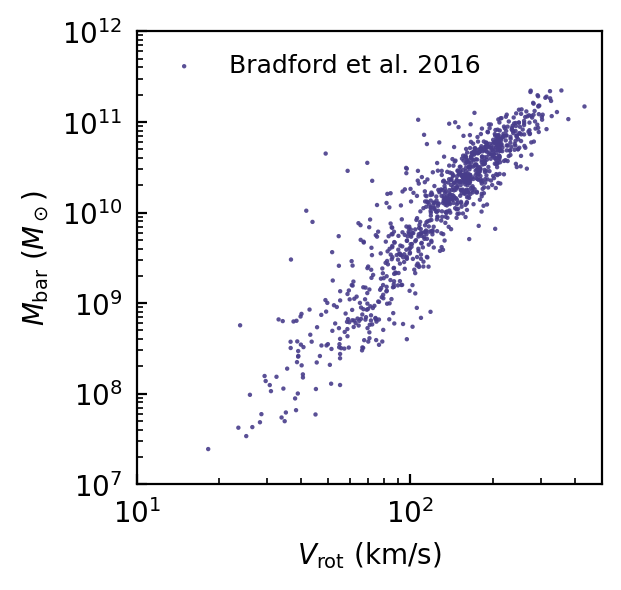

In [9]:
plt.figure(figsize=(3.,3.))
plt.xscale('log'); plt.yscale('log')
plt.xlim([10.,500.]); plt.ylim([1.e7,1.e12]) 
plt.xlabel(r'$V_{\rm rot}\rm\ (km/s)$'); plt.ylabel(r'$M_{\rm bar}\ (M_\odot)$')
plt.scatter(vrot, 10.**y,marker='.',c='darkslateblue',s=10.,alpha=0.9,edgecolor='none', label='Bradford et al. 2016')

plt.legend(frameon=False,loc='upper left', fontsize=9)
plt.show()

Examining the plot above, you should notice that there is an overall trend that can be described by a linear relation, but there is also quite a bit of scatter.   This scatter can be due to measurement errors of $\log_{10}M_{\rm bar}$ and $\log_{10}V_{\rm rot}$. However, it is also possible that there is *intrinsic* scatter - i.e. real physical scatter of galaxies in the plane of $\log_{10}M_{\rm bar}-\log_{10}V_{\rm rot}$ around average linear region, which would be useful to constrain (if it's small) or measure.     
    
To this end, we will introduce an additional parameter in the linear model discussed in notebook <a href="https://drive.google.com/file/d/1kr3pFtePLZdaQZxutq7lvAgmZvrs0ik-/view?usp=sharing">04_mcmc_linear_fit</a> - *intrinsic* scatter, $s$, around average linear trend. 

For data vectors $\vec{x}=\{x_i\}$, $\vec{y}=\{y_i\}$ and a linear model $\vec{y}=c + b\vec{x}$ with intrinsic Gaussian scatter in $y$ direction  the likelihood can be written as (see, for example, <a href="http://adsabs.harvard.edu/abs/2005physics..11182D">D'Agostini 2005</a>): 

$$
\mathcal{L}_{\rm m,i}(x_i,y_i,\sigma_{x_i}, \sigma_{y_i}\vert c,b,s)=
\frac{1}{\sqrt{2\pi\sigma^2_{\rm tot,i}}}\,\exp\left[-\frac{(y_i-bx_i-c)^2}{2\sigma^2_{\rm tot,i}}\right].
$$

where

$$
\sigma^2_{\rm tot,i} = s^2+\sigma^2_{y_i}+b^2\sigma^2_{x_i},
$$

and $\sigma_{x_i}$ and $\sigma_{y_i}$ are the Gaussian uncertainties of $x_i$ and $y_i$, respectively. Such likelihood is equivalent to using cost function in likelihood maximization that is given by the distance from each measurement to the model line along $y$ axis.

The total likelihood for all data points is simply the product of the individual likelihoods (this assumes that measurements are independent): 

$$\mathcal{L}_{\rm m}(\vec{x},\vec{y}, \vec{\sigma}_x,\vec{\sigma}_y\vert c, b, s) = \prod\limits_{i=0}^{N_{\rm data}-1} \mathcal{L}_{\rm m,i} $$

Here we will using Bayes theorem to estimate the intercept, $c$, slope, $m$, and intrinsic scatter $s$ of a linear model for $\log_{10} M_{\rm bar}-\log_{10} V_{\rm rot}$ for the   <a href="http://adsabs.harvard.edu/abs/2016ApJ...832...11B">Bradford et al. (2016)</a> sample.

***Prior pdf:***
As the prior pdf for this model we will use distribution that assumes uniform distribution of angle of the line of the linear model wrt $x$-axis (i.e. uniform distribution of $\tan b$) and distribution of $c$ that is uniform and invariant to rotation of the coordinate axes (see notebook <a href="https://drive.google.com/file/d/1kr3pFtePLZdaQZxutq7lvAgmZvrs0ik-/view?usp=sharing">04_mcmc_linear_fit</a>):

$$p(c,b,s)=\frac{1}{2\pi(c_{\rm max}-c_{\rm min})(s_{\rm max}-s_{\rm min})}\,\frac{1}{(1+b^2)^{3/2}},$$


#### <font color='darkblue'> Task 4a. Linear model inference using test case (10 points)
    
Sample 3-dimensional ***posteriod distribution*** using MCMC sampler you developed in the exercises above until you have sufficient number of samples and samples are converged
    
$$\pi(c,b,s\vert x_i,y_i,\sigma_{x_i}, \sigma_{y_i})=\mathcal{L}_{\rm m}(\vec{x},\vec{y}, \vec{\sigma}_x,\vec{\sigma}_y\vert c, b, s)\,p(c,b,s)$$
    
using mock data generated below. Plot 2d distribution of samples in the $c-b$ and $s-b$ planes with $1-$ and $2-\sigma$ contours and demonstrate that you get an unbiased estimate of the true slope and intercept (i.e., input values <tt>ctrue</tt> and <tt>btrue</tt> lie within the contours. 

***Note:*** as input for your sample you should implement a function computing $\ln\pi$ to avoid numerical underflow during sampling. 
    
***Note:*** if you did not succeed in implementing MCMC sampler, you can use <tt>mcmc_simple</tt> function introduced in notebooks 03 and 04 or <tt>emcee</tt> package (see below for example use). 


In [10]:
def generate_mock_data(xlims, ex, ey, eboost=1., btrue=3, ctrue=3.481, nr = 2000):
    xr = np.random.uniform(xlims[0], xlims[1], size=nr) 

    exr = np.random.normal(scale=ex, size=nr)
    eyr = np.random.normal(scale=ey, size=nr)

    yr = btrue * xr + ctrue + eyr*eboost
    xr = xr + exr
    
    return xr, exr, yr, eyr

In [11]:
def plot_mock_data(xr, yr, exr=None, eyr=None, 
                   btrue=None, ctrue=None, figsize=(5,5)):
    # plot mock data
    plt.figure(figsize=figsize)
    plt.errorbar(xr, yr, xerr=exr, yerr=eyr, fmt='o', alpha=0.5, color='darkslateblue')
    plt.xlabel(r'$x$')
    plt.ylabel('$y$')
    xf = np.linspace(xr.min(), xr.max(), 10)
    plt.plot(xf, btrue * xf + ctrue, '--', c='orangered', label='true model')
    plt.legend(loc='best', frameon=False)
    plt.show()

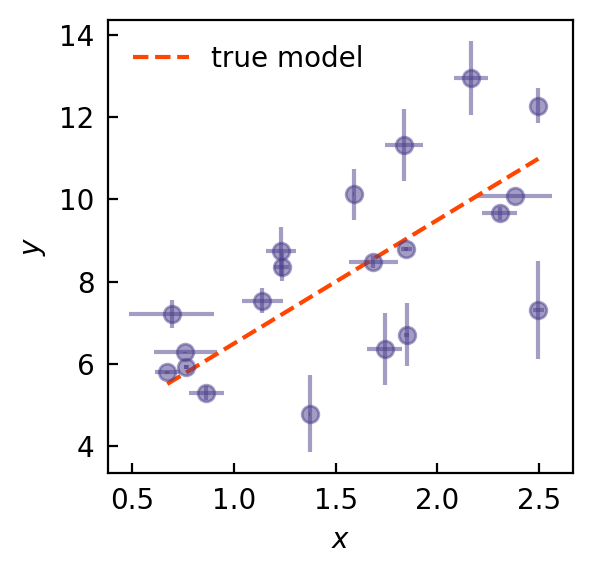

In [12]:
# generate mock data with a given slope and intercept
nr = 20 # number of data points to generate
btrue, ctrue = 3, 3.5
ex, ey = 0.1, 0.5
xr, exr, yr, eyr = generate_mock_data([0.7, 2.5], ex, ey, eboost=3, btrue=btrue, ctrue=ctrue, nr=nr)

plot_mock_data(xr, yr, exr=exr, eyr=eyr, btrue=btrue, ctrue=ctrue, figsize=(3,3))

#### <font color='darkblue'> Task 4b. Linear model inference using real data (5 points)

Repeat this analysis for the real data. Plot 2d distribution of samples in the $c-b$ and $s-b$ planes with $1-$ and $2-\sigma$ contours. Is your constraint on the slope of the relation consistent with the prediction of $b=4$ from the MOND model? 

### <font color='darkblue'>Exercise 5 (extra-credit): model testing (10 points)

Consider a quadratic model $y=ax^2+bx+c$. Carry out parameter inference for such model using a uniform prior for $a$ and plot parameter constraints in the planes $a-b$, $b-c$, and $s-b$ (5 points). 
    
Make an argument whether Bayesian Information Criterion (BIC) would provide a good approximation for the Bayesian evidence in this case. Compute BIC for the linear and quadratic model and conclude whether there is observational evidence that quadratic model provides a better fit than the linear one (5 points). 

### <font color='darkblue'>Example of using <tt>emcee</tt> package to sample 2d Gaussian


In [13]:
import emcee

ndim, nwalkers, nsteps = 2, 50, 10000

# initialize walkers
p0 = 1. + np.random.normal(scale=0.1, size=ndim * nwalkers).reshape((nwalkers, ndim))

# initialize MCMC sample
sampler = emcee.EnsembleSampler(nwalkers, ndim, lngauss_nd, args=[means,icov])

# run for a given nsteps
pos, prob, state = sampler.run_mcmc(p0, nsteps)

# get chain
chain = sampler.chain

NameError: name 'means' is not defined

In [ ]:
# define levels to plot (fractions of samples enclosed by the contours)
conflevs = [0.6827, 0.9545]

# plot distribution of MCMC samples as a 2d histogram with contours
# in the $x_0-x_1$ plane, where $x_0$ and $x_1$ are 2 Gaussian variables
# chain[:,0], chain[:,1] access sample values of two variables separately
plot_2d_dist(chain[:,:,0].flatten(), chain[:,:,1].flatten(), xlim=[-4,4], ylim =[-4,4], nxbins=100, nybins=100, 
             clevs=conflevs,  xlabel='$x_0$', ylabel='$x_1$', figsize=(3,3))

In [ ]:
# compute tcorr
for i in range(ndim):
    tcorr = compute_tcorr(chain[:,:,i].flatten(), 10000)[0]
    print('auto-correlation length for dimension {:d} = {:.3f}'.format(i, tcorr))

In [ ]:
# step acceptance fraction: 

print(np.shape(np.unique(chain[:,:,0])))